In [1]:
import random
random.seed(24071992)
import numpy as np
np.random.seed(24071992)
import matplotlib
import matplotlib.pyplot as plt
import scipy.spatial

In [2]:
import scipy
scipy.spatial.KDTree.sparse_distance_matrix

<function scipy.spatial.kdtree.KDTree.sparse_distance_matrix>

In [3]:
%matplotlib inline 

# Random cells

In [4]:
centroid = np.random.rand(50,2)

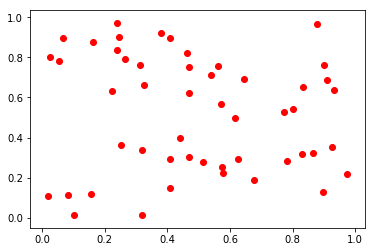

In [5]:
def cell_scatter(arr2D, color='blue'):
    for i in range(len(arr2D)):
        plt.scatter(arr2D[i][0], arr2D[i][1], c=color)
        
cell_scatter(centroid, 'red')

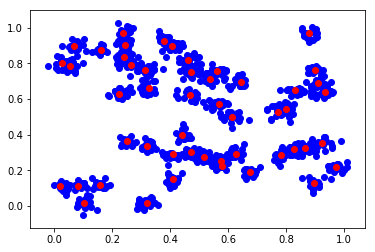

In [6]:
cloud = 20
dots = np.zeros([len(centroid)*cloud, 2])
for i, p in enumerate(centroid):
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.02)
        y_shift = np.random.normal(0, scale=0.02)
        dots[pos] = p[0]+x_shift, p[1]+y_shift

cell_scatter(dots)
cell_scatter(centroid, color='red')

(array([  3.,   2.,   0.,   1.,   4.,   3.,   5.,   4.,   1.,   6.,   2.,
          2.,  10.,   4.,  10.,   3.,   3.,   6.,   6.,   6.,   3.,   9.,
         10.,   3.,   5.,   7.,   6.,  11.,   9.,   9.,  10.,   7.,  10.,
          9.,   6.,   5.,   8.,   5.,   6.,  15.,  10.,   7.,   7.,   7.,
          4.,   7.,   9.,  13.,  13.,  10.,  11.,  10.,   8.,   9.,  13.,
         11.,   9.,   9.,  10.,  12.,  10.,  10.,   7.,   7.,  12.,   5.,
         15.,  11.,   7.,   8.,   8.,  10.,  17.,   5.,   9.,   5.,  19.,
          7.,   4.,  14.,  15.,  14.,  10.,  12.,  11.,   6.,  13.,   8.,
          8.,   8.,  13.,   8.,  10.,   8.,   7.,  10.,  13.,   8.,   9.,
          9.,  13.,  11.,   7.,   6.,   8.,   7.,   8.,   9.,  10.,  11.,
          9.,   6.,   8.,   7.,  11.,   8.,   8.,   8.,   7.,   6.,  11.,
          9.,   4.,   9.,   8.,  14.,   9.,   7.,   5.,   8.,   5.,   9.,
         10.,   2.,   6.,   7.,   5.,   3.,   8.,   5.,   9.,   6.,   5.,
          7.,   7.,   3.,   2.,   4., 

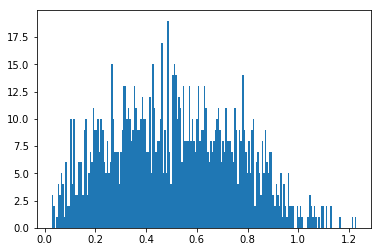

In [7]:
dist = scipy.spatial.distance.pdist(centroid)
plt.hist(dist,bins=200)

# Cells in a grid

[ 0.  0.]
[ 0.  1.]
[ 0.  2.]
[ 0.  3.]
[ 1.  0.]
[ 1.  1.]
[ 1.  2.]
[ 1.  3.]
[ 2.  0.]
[ 2.  1.]
[ 2.  2.]
[ 2.  3.]
[ 3.  0.]
[ 3.  1.]
[ 3.  2.]
[ 3.  3.]


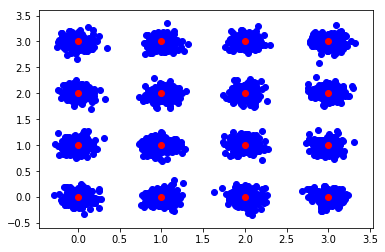

In [8]:
cloud = 200
grid_c = np.zeros([16, 2])

for i, p in enumerate(grid_c):
    x = int(i/4)
    y = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
    y = y[i]
    grid_c[i] = x,y

    
grid_p = np.zeros([len(grid_c)*cloud, 2])
for i, p in enumerate(grid_c):
    print(p)
    for n in range(cloud):
        pos = i*cloud + n
        x_shift = np.random.normal(0, scale=0.1)
        y_shift = np.random.normal(0, scale=0.1)
        grid_p[pos] = p[0]+x_shift, p[1]+y_shift
    
cell_scatter(grid_p)
cell_scatter(grid_c, color='red')

(array([  1.79170000e+04,   4.75340000e+04,   6.31100000e+04,
          6.29920000e+04,   5.09040000e+04,   3.51950000e+04,
          2.12430000e+04,   1.11430000e+04,   5.07500000e+03,
          2.17500000e+03,   9.61000000e+02,   8.44000000e+02,
          1.63600000e+03,   4.16800000e+03,   9.56000000e+03,
          1.95230000e+04,   3.53120000e+04,   5.80190000e+04,
          8.33260000e+04,   1.08487000e+05,   1.26609000e+05,
          1.31966000e+05,   1.23330000e+05,   1.06880000e+05,
          8.94690000e+04,   7.77330000e+04,   7.56830000e+04,
          8.25790000e+04,   9.20730000e+04,   9.87880000e+04,
          9.57670000e+04,   8.45840000e+04,   6.71870000e+04,
          4.85310000e+04,   3.27030000e+04,   2.34580000e+04,
          2.21160000e+04,   2.92300000e+04,   4.32500000e+04,
          6.21970000e+04,   8.34380000e+04,   1.04982000e+05,
          1.23968000e+05,   1.38417000e+05,   1.49037000e+05,
          1.56122000e+05,   1.55477000e+05,   1.45544000e+05,
        

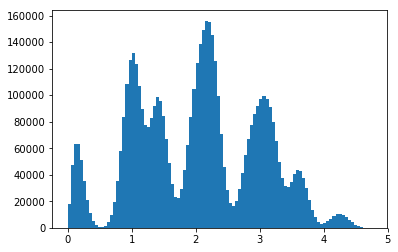

In [9]:
dist = scipy.spatial.distance.pdist(grid_p, )
plt.hist(dist,bins=100)

In [10]:
#scipy.spatial.KDTree.sparse_distance_matrix()
grid_p_tree = scipy.spatial.KDTree(grid_p)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4. ]


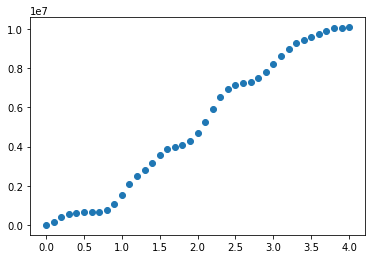

In [11]:
interval = np.linspace(0,4,41)
print(interval)
plt.scatter(interval, grid_p_tree.count_neighbors(grid_p_tree, interval))
#Logically, the KDTree has more neighbours if you increase the range.
#You see the same jumps as with the above histogram

# Sparse distance matrix

In [42]:
grid_p_sparse = grid_p_tree.sparse_distance_matrix(grid_p_tree, max_distance=3)
grid_p_sparse

<3200x3200 sparse matrix of type '<class 'numpy.float64'>'
	with 8183008 stored elements in Dictionary Of Keys format>

(array([  14468.,   41684.,   62672.,   76520.,   81926.,   80616.,
          71256.,   59754.,   47062.,   35216.,   24860.,   16422.,
          10390.,    6200.,    3676.,    2086.,    1242.,     982.,
           1124.,    1722.,    3030.,    5430.,    9396.,   15336.,
          24046.,   35008.,   49638.,   68286.,   88768.,  108774.,
         129196.,  147370.,  160054.,  167118.,  165106.,  157246.,
         145978.,  131058.,  117210.,  104990.,   97438.,   94876.,
          96554.,  103618.,  111300.,  118764.,  124104.,  124498.,
         120476.,  111560.,   99474.,   84982.,   69694.,   55812.,
          42762.,   34020.,   28522.,   26988.,   30196.,   37026.,
          47850.,   61152.,   76702.,   93122.,  110920.,  127870.,
         143836.,  158592.,  169424.,  181018.,  188166.,  193796.,
         198992.,  196926.,  191392.,  181452.,  164970.,  146924.,
         124378.,  101724.,   79262.,   59944.,   44202.,   32470.,
          25180.,   20790.,   20128.,   23026., 

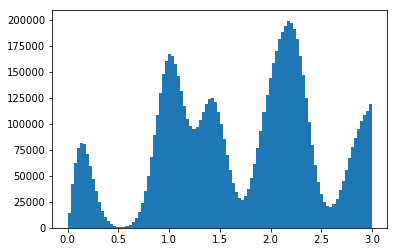

In [43]:
sparse_values = np.array(list(grid_p_sparse.values()))
plt.hist(sparse_values, bins=100)

In [14]:
import peakutils

In [44]:
sparse_hist, sparse_bin_edges = np.histogram(sparse_values, bins=100)

In [45]:
#Peaks of histogram
peakutils.indexes(sparse_hist, thres=0.3, min_dist=0.2)

array([ 4, 33, 47, 72])